Das Notebook ist zum ausführen der Userstorys. Der erste Block muss immer ausgeführt werden!

### Einmal vor dem Start ausführen

In [ ]:
import os
original = "database/original.db"
working = "database/hotel_reservation_sample_working.db"
os.environ["DB_FILE"] = working

### Ausführen 1x beim start, sonst wenn man die DB resetten will

In [ ]:
import shutil
shutil.copyfile(original, working)

### Immer ausführen, damit dei Imports funktionieren


In [ ]:
from datetime import date
import business_logic
import ui

Hotel_manager = business_logic.HotelManager()
Room_manager = business_logic.RoomManager()
Booking_manager= business_logic.BookingManager()
Invoice_manager = business_logic.InvoiceManager()
Adress_manager = business_logic.AddressManager()
Guest_manager= business_logic.GuestManager()



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Als Gast möchte ich die verfügbaren Hotels durchsuchen, damit  ich dasjenige auswählen kann, welches meinen Wünschen  entspricht. Wünsche sind:

### 1.1. Ich möchte alle Hotels in einer Stadt durchsuchen, damit ich das Hotel nach meinem bevorzugten Standort (Stadt) auswählen kann.

In [ ]:
# UI
input_city = ui.hotel_ui.get_city_input()

# Business Logic
by_city = Hotel_manager.get_hotels_by_city(input_city)

#Output
if not by_city:
    print(f"No hotels found in: {input_city}.")
else:
    Hotel_manager.print_user_friendly_hotels(by_city)

Erklärung:

UI: In der Hotel UI wird durch get_city_input sichergestellt das mindestens 3 Buchstaben und höchstens 10 eingegeben werden. Durch einen while loop wird es bei falschen input weiter versucht bis ein richtiger kommt. Der Output kommt durch die Funktion print user friendly in der die relevanten informationen für jedes gegeben Hotel objekt geprinted werden.

BL: Es werden alle Hotels in die Business Logic (BL) geladen durch self._all_hotels . Dann wird gefiltert nach city.lower() in hotel.address.city.lower(). Dadurch muss man nicht die genaue Stadt ausschreiben.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###  1.2. Ich möchte alle Hotels in einer Stadt nach der Anzahl der Sterne (z.B. mindestens 4 Sterne) durchsuchen.

In [ ]:
# UI
input_city = ui.hotel_ui.get_city_input()
input_stars = ui.hotel_ui.get_stars_input()

# Business Logic
by_city_and_stars = Hotel_manager.get_hotels_by_city_and_stars(input_city,input_stars)

# Output
if not by_city_and_stars:
    print(f"No hotels found in: {input_city} with {input_stars} stars.")
else:
    Hotel_manager.print_user_friendly_hotels(by_city_and_stars)


Erklärung:

UI: get_city_input() prüft wie zuvor die Gültigkeit des Stadtnamens. get_stars_input() stellt sicher, dass nur Ganzzahlen zwischen 1 und 5 eingegeben werden. Ungültige Eingaben führen zu einer Wiederholung der Abfrage durch eine while True-Schleife.

BL: Die Methode get_hotels_by_city_and_stars(city, stars) lädt alle Hotels und filtert mit einer zusätzlichen Bedingung: hotel.address.city.lower() == city.lower() and hotel.stars >= stars. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 1.3. Ich möchte alle Hotels in einer Stadt durchsuchen, die Zimmer haben, die meiner Gästezahl entsprechen (nur 1 Zimmer pro Buchung).

In [ ]:
# UI
input_city = ui.hotel_ui.get_city_input()
input_max_guests = ui.hotel_ui.get_max_guests_input()

# Business Logic
by_max_guests = Hotel_manager.get_hotels_by_city_and_max_guests(input_city, input_max_guests)

# Output
if not by_max_guests:
    print(f"No hotels found in: {input_city} with max guests: {input_max_guests}.")
else:
    Hotel_manager.print_user_friendly_hotels(by_max_guests)

Erklärung: 

UI: Wie zuvor wird der Stadtnamen über get_city_input() geprüft. get_max_guests() stellt sicher, dass nur gültige Zahlen (1–50) eingegeben werden, da mehr Gäste in einem Zimmer unrealistisch sind.

BL: Im Hotelmanager wird wie vorher nach stadt gesucht. Jetzt wird aber der Room_manager aufgerufen, zuerst mit der funktion "get_room_details_for_hotel(hotel.hotel_id)" also werden die rooms mit der hotel.id geholt und dann wird durch "[room for room in rooms if room.max_guests >= max_guests]" geprüft ob die max guest gleich oder größer sind. Die passenden Hotels werden dann returned. Ich habe extra nicht die Room infos mitgegeben, da ich es im Hotelmanager klären wollte und der Gast "alle Hotels in einer Stadt" durchsuchen will, also als Ouput meiner Interpretation nach die Hotels aufgelistet haben möchte.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 1.4. Ich möchte alle Hotels in einer Stadt durchsuchen, die während meines Aufenthaltes ("von" (check_in_date) und "bis" (check_out_date)) Zimmer zur Verfügung haben, damit ich nur relevante Ergebnisse sehe.

In [ ]:
# UI
input_city = ui.hotel_ui.get_city_input()
input_checkin= ui.booking_ui.get_checkin_date_input()
input_checkout= ui.booking_ui.get_checkout_date_input()


# Business Logic
Hotels= Booking_manager.read_av_rooms_city(input_city, input_checkout, input_checkin)

# Output
if not Hotels:
    print(f"There are no available rooms in {input_city}")
else:
    for hotel in Hotels:
        print(ui.booking_ui.get_userfriendly_room(hotel))

In dieser User Story kann der Gast alle verfügbaren Zimmer in einer bestimmten Stadt durchsuchen, indem er die Stadt sowie ein Check-in- und ein Check-out-Datum angibt. Das System liefert daraufhin eine Übersicht aller verfügbaren Zimmer im gewünschten Zeitraum nur für Hotels in der gewählten Stadt.

Zu Beginn wird der Nutzer aufgefordert, eine Stadt sowie ein Check-in- und Check-out-Datum einzugeben. Diese drei Eingaben dienen als Filterkriterien für die Verfügbarkeitsabfrage.

Anschliessend wird die Methode read_av_rooms_city(...) mit diesen Eingaben aufgerufen. Sie gibt eine Liste aller verfügbaren Zimmer in der gewünschten Stadt und im angegebenen Zeitraum zurück.

Falls Zimmer verfügbar sind, werden sie direkt und benutzerfreundlich mit get_userfriendly_room(...) angezeigt – jeweils mit den wichtigsten Details zum Zimmer. Eine weitere Auswahl oder Schleife erfolgt in dieser Version nicht.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 1.5. Ich möchte Wünsche kombinieren können, z.B. die verfügbaren Zimmer zusammen mit meiner Gästezahl und der mindest Anzahl Sterne.

In [ ]:
#UI
city = ui.input_helper.input_y_n("Do you want to book in a specific city? (Y or N)", )
if city:
    input_city = ui.hotel_ui.get_city_input()
else: 
    input_city = None

stars = ui.input_helper.input_y_n("Do you want to book a hotel with a specific number of stars? (Y or N)", )
if stars:
    input_stars = ui.hotel_ui.get_stars_input()
else:
    input_stars = None

max_guests = ui.input_helper.input_y_n("Do you want to book a hotel with a specific number of max guests? (Y or N)", )
if max_guests:
    input_max_guests = ui.hotel_ui.get_max_guests_input()
else:
    input_max_guests = None

check_dates= ui.input_helper.input_y_n("Do you want to search all available rooms with a specific check-in and check-out date? (Y or N)")
if check_dates:
    input_checkin= ui.booking_ui.get_checkin_date_input()
    input_checkout= ui.booking_ui.get_checkout_date_input()
else:
    input_checkin = None
    input_checkout = None

# Business Logic
result = Hotel_manager.get_users_individual_wishes(input_city,stars,max_guests, input_checkin, input_checkout)

# Output
if not result:
    print("No hotels found with your wishes.")
else:
    Hotel_manager.print_user_friendly_hotels(result)

Erklärung:

UI: Mit input_y_n() wird der Nutzer gefragt, ob er nach bestimmten Kriterien (z. B. Stadt, Sterne, Gästezahl, Datum) filtern möchte. Nur wenn „Yes“ gewählt wird, wird die jeweilige Eingabefunktion aufgerufen.
Ansonsten wird None übergeben – das bedeutet: dieser Filter ist für die Suche nicht aktiv.

BL: Die Methode get_users_individual_wishes(...) verarbeitet alle Eingaben.
Jeder Parameter wird nur berücksichtigt, wenn er nicht None ist – so kann der Nutzer flexibel eine beliebige Kombination aus Kriterien verwenden. Die Funktion vereint alle Funktionen der voherigen Userstorys.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 1.6. Ich möchte die folgenden Informationen pro Hotel sehen: Name, Adresse, Anzahl der Sterne.

In [ ]:
# UI

# Business Logic
all_hotels = Hotel_manager.read_all_hotels()

# Output
Hotel_manager.print_user_friendly_hotels(all_hotels)


Erklärung:

UI: Für diese Anforderung ist keine Benutzereingabe notwendig. Es handelt sich um eine reine Ausgabefunktion.

BL: Über die Methode read_all_hotels() werden alle Hotelobjekte aus der Datenbank geladen. Die Informationen enthalten neben Name und Sterne auch die zugehörige Adresse, da diese bereits beim Laden verknüpft wird (z. B. durch einen JOIN oder Objektverknüpfung in der DAL).


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 2. Als Gast möchte ich Details zu verschiedenen Zimmertypen (Single, Double, Suite usw.), die in einem Hotel verfügbar sind, sehen, einschliesslich der maximalen Anzahl von Gästen für dieses Zimmer, Beschreibung, Preis und Ausstattung, um eine fundierte Entscheidung zu treffen.

### 2.1. Ich möchte die folgenden Informationen pro Zimmer  sehen: Zimmertyp, max. Anzahl der Gäste, Beschreibung,  Ausstattung, Preis pro Nacht und Gesamtpreis.

In [ ]:
#UI + Business Logic
input_city = ui.hotel_ui.get_city_no_limit()

valid = False
while not valid:
    hotels_by_city = Hotel_manager.get_hotels_by_city(input_city)
    if not hotels_by_city:
        print(f"No hotels found in: {input_city}. Please try again.")
        input_city = ui.hotel_ui.get_city_input()
    else:
        for i, hotel in enumerate(hotels_by_city, 1):
            print(f"{i}. {ui.hotel_ui.get_user_frendly_hotel_info_short(hotel)}")
        try:
            input_idx = ui.input_helper.input_valid_int("Select Hotel: ", 1, len(hotels_by_city)) - 1
            selected_hotel = hotels_by_city[input_idx]
            valid = True
        except ui.input_helper.OutOfRangeError as e:
            print(f"Invalid input, please select a number between 1 and {len(hotels_by_city)}.")
        except ValueError as e:
            print("Invalid input, please enter a valid number.")

# Output
print(f"{selected_hotel.name} has following rooms:")
rooms = Room_manager.get_room_info_user_friendly(selected_hotel.hotel_id)
# Output
if rooms is None:
    print("")
else:
    for room in rooms:
        for key, value in room.items():
            print(f"{key}: {value}")
        print("-"*30)
    print("-"*30) 

Erklärung:

UI: Zuerst wird der Benutzer gebeten, eine Stadt einzugeben, in der er ein Hotel suchen möchte. Dafür wurde eine eigene Funktion get_city_no_limit() erstellt, bei der keine Eingabebeschränkung in der Länge gilt. Danach wird in einer Schleife geprüft, ob in der angegebenen Stadt Hotels existieren. Wenn keine Hotels gefunden werden, wird der Benutzer erneut zur Eingabe aufgefordert. Falls Hotels vorhanden sind, werden diese in einer nummerierten Liste angezeigt. Damit der Benutzer eines der Hotels gezielt auswählen kann, wird ihm die Liste mit Indexnummern präsentiert (beginnend bei 1 für bessere Lesbarkeit). Um dies umzusetzen, wurde bewusst mit enumerate(..., 1) gearbeitet – dadurch beginnt die Zählung bei 1 statt bei 0. Beim Auswählen des Hotels gibt der Benutzer eine Zahl ein (z. B. 2 für das zweite Hotel). Diese Zahl wird dann intern auf den richtigen Listenindex umgerechnet. Da input_valid_int als Maximalwert len(hotels_by_city) - 1 erwartet, passt der Index zur tatsächlichen Position im Array – die Eingabe wird also sicher auf einen gültigen Listenbereich beschränkt.
Um Fehler wie „Index außerhalb des gültigen Bereichs“ zu vermeiden, wird zusätzlich eine eigene Fehlerbehandlung mit OutOfRangeError und ValueError verwendet.

Diese Logik zur Indexverarbeitung und Fehlervermeidung wurde gemeinsam mit Coach Phillip überlegt und umgesetzt, um maximale Benutzerfreundlichkeit und Systemsicherheit zu gewährleisten.

BL: Sobald ein gültiges Hotel ausgewählt wurde, wird dessen hotel_id an den RoomManager übergeben. Gleichzeitig werden fie Facilities auch mit der Funktion: get_facilities_for_room über die Room_id geholt. "Gesamtpreis" kann man nicht anzeigen lassen, da nicht bekannt ist wie langer der Kunde Buchen will. Wir haben die User-Story so verstanden, das es nur um die Zimmer geht und noch keine Buchung vorgenommen wurde. Deshalb können wir auch nur den price per night darstellen.

Output: Der Output besteht aus einer Liste von Dictionaries, wobei jedes Dictionary die Informationen eines Zimmers enthält. Um die Ausgabe für den Benutzer leserlicher zu gestalten, wird die Liste mit einer Schleife durchlaufen, und jedes Dictionary wird formatiert untereinander ausgegeben. Dabei werden die einzelnen Schlüssel-Wert-Paare sauber eingerückt und mit einem Trenner ("-" * 30) voneinander abgegrenzt.
So entsteht ein benutzerfreundliches, strukturiertes Layout

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 2.2. Ich möchte nur die verfügbaren Zimmer sehen, sofern  ich meinen Aufenthalt (von – bis) spezifiziert habe

In [ ]:
#UI
input_checkin= ui.booking_ui.get_checkin_date_input()
input_checkout= ui.booking_ui.get_checkout_date_input()

valid= False


while not valid:
    av_rooms= Booking_manager.read_av_rooms(input_checkout, input_checkin)

    if av_rooms:
        #Output
        for i, room in enumerate(av_rooms,1):
            print(f"{i}. {ui.booking_ui.get_userfriendly_room(room)}")
        valid= True     
    elif not av_rooms:
        print(f"No rooms were found from {input_checkin} to {input_checkout}")
        try_again= ui.input_helper.input_y_n("Do you want to try again? (Y or N)")
        if try_again:
            input_checkin= ui.booking_ui.get_checkin_date_input()
            input_checkout= ui.booking_ui.get_checkout_date_input()
            valid= False
        else:
            print(f"Thank you and see you soon!")
            valid= True

In dieser User Story soll dem Gast ermöglicht werden, verfügbare Zimmer für einen gewünschten Zeitraum zu sehen. Dazu werden Check-in- und Check-out-Daten abgefragt. Zu Beginn wird eine Validierungsvariable valid auf False gesetzt, woraufhin ein while-Loop startet. Innerhalb dieses Loops ruft das System die Methode `get_available_rooms` des Booking-Managers auf, die die eingegebenen Datumswerte als Parameter erhält.

Ein zentrales Validierungskriterium ist dabei, dass das Check-in-Datum chronologisch vor dem Check-out-Datum liegen muss – andernfalls wird der Input als ungültig gewertet. Diese Prüfung erfolgt über die Funktion read_available_rooms.

Die Entwicklung dieser Logik war nicht trivial. Gemeinsam mit Coach Philipp wurden mehrere Fälle intensiv diskutiert, um die Funktionalität robust zu gestalten. Die Methode zur Zimmerverfügbarkeitsprüfung wurde so aufgebaut, dass sie vier unterschiedliche Buchungskonstellationen korrekt verarbeitet:
- wenn der angefragte Zeitraum länger ist als eine einzelne bestehende Buchung,
- wenn zwei kürzere Buchungen innerhalb des angefragten Zeitraums liegen, aber eine Lücke dazwischen existiert,
- wenn Teilüberschneidungen mit bestehenden Buchungen vorliegen,
- sowie andere komplexe Kombinationen mit zeitlichen Lücken zwischen Buchungen.

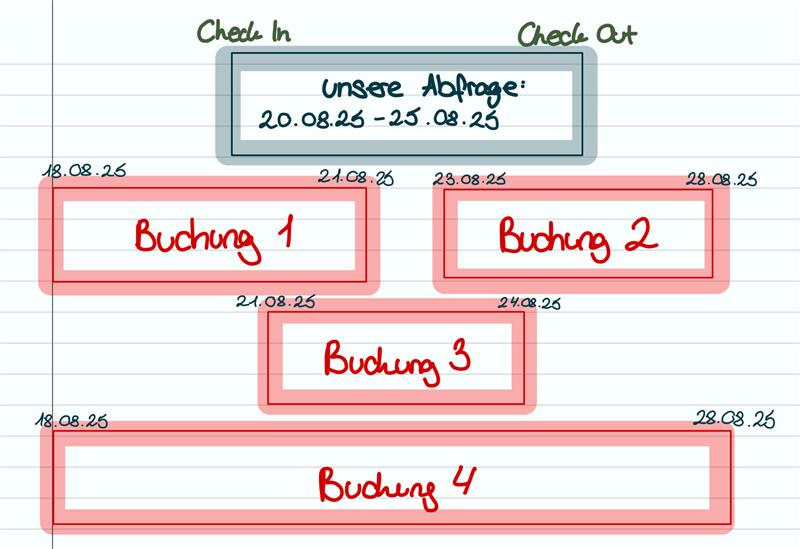

Wenn verfügbare Zimmer gefunden werden (if av_rooms), erfolgt folgendes Vorgehen:
– Es wird eine Liste der verfügbaren Zimmer erstellt, bei der die Indizierung benutzerfreundlich bei 1 beginnt,
– für jedes Zimmer wird die Methode `get_user_friendly_room` aus der BookingUI aufgerufen, um eine verständliche Darstellung der Zimmerinformationen zu erzeugen,
– anschliessend wird die Variable valid auf True gesetzt, womit der Loop beendet wird.

Falls keine Zimmer für den gewünschten Zeitraum verfügbar sind, wird dem Gast mitgeteilt:
"No rooms were found from [Check-in] to [Check-out]."

Daraufhin wird der Gast gefragt, ob er eine neue Anfrage stellen möchte:
– Entscheidet er sich für eine neue Suche, werden erneut Check-in- und Check-out-Daten abgefragt, und valid bleibt False, sodass der Loop erneut durchlaufen wird.
– Bricht der Gast die Suche ab, bedankt sich das Programm für die Nutzung, und valid wird auf True gesetzt, um den Vorgang zu beenden.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 3. Als Admin des Buchungssystems möchte ich die Möglichkeit haben,  Hotelinformationen zu pflegen, um aktuelle Informationen im  System zu haben.

### 3.1. Ich möchte neue Hotels zum System hinzufügen

In [ ]:
# UI
new_name = ui.input_helper.input_valid_string("Enter new hotel name: ", 1, 50)
new_stars = ui.input_helper.input_valid_int("Enter new hotel stars: ", 1, 5)
new_adress = ui.input_helper.input_y_n("Do you want to create a new adress for the hotel? (Y or N)", )
if new_adress:
    new_street = ui.input_helper.input_valid_string("Enter new street: ", 1, 50)
    new_city = ui.input_helper.input_valid_string("Enter new city: ", 1, 20)
    new_zip = ui.input_helper.input_valid_string("Enter new zip code: ", 1, 20)
    new_adress = Adress_manager.create_new_address(new_street, new_city, new_zip)
else:
    all_adresses = Adress_manager.read_all_addresses()
    for i, address in enumerate(all_adresses, 1):
        print(f"{i}. {ui.hotel_ui.get_address_short(address)}")

    new_adress = None
    while new_adress is None:
        try:
            input_idx = ui.input_helper.input_valid_int("Select address: ", 1, len(all_adresses)) - 1
            new_adress = all_adresses[input_idx]
        except ui.input_helper.OutOfRangeError as e:
            print(f"Invalid input, please select a number between 1 and {len(all_adresses)}.")
        except ValueError as e:
            print("Invalid input, please enter a valid number.")


# Business Logic
Hotel_manager.create_new_hotel(new_name, new_stars, new_adress.address_id)

Erklärung:

UI: Der Benutzer gibt Hotelname und Sterneanzahl ein. Danach wird abgefragt, ob eine neue Adresse erstellt oder eine bestehende ausgewählt werden soll. Bei neuer Adresse werden Straße, Stadt und PLZ erfasst. Bei bestehender Auswahl wird eine Liste angezeigt und per Index ausgewählt – mit Fehlerprüfung. Die idee dahinter war, irgendwann eine DB mit allen Addressen zu haben, also bräuchte man eine möglichkeit nicht immer neue zu erstellen, sondern auch existierende zu verknüpfen.

BL: Die Methode create_new_hotel(...) erstellt das Hotel mit Name, Sterne und address_id. Ohne Adresse kann kein Hotel erstellt werden.

Output: Das neue Hotel wird in der Datenbank gespeichert. Die Eingabe- und Auswahlstruktur folgt dem gleichen Prinzip wie bei vorherigen User Stories. Sobald eine neues Hotel erstellt wurde, wird es nochmals angezeigt und die gesamte DB der Hotels wird gedruckt, damit der Admin seine Änderung besser nachvollziehen und verfolgen kann.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 3.2. Ich möchte Hotels aus dem System entfernen


In [ ]:
# UI
all_hotels = Hotel_manager.read_all_hotels()
for i, hotel in enumerate(all_hotels, 1):
    print(f"{i}. {ui.hotel_ui.get_user_frendly_hotel_info_short(hotel)}")

found = False
while not found:
    try:
        input_idx = ui.input_helper.input_valid_int("Select hotel to delete: ", 1, len(all_hotels)) - 1
        selected_hotel = all_hotels[input_idx]
        found = True
    except ui.input_helper.OutOfRangeError as e:
        print(f"Invalid input, please select a number between 1 and {len(all_hotels)}.")
    except ValueError as e:
        print("Invalid input, please enter a valid number.")

# Business Logic
Hotel_manager.delete_hotel_by_id(selected_hotel.hotel_id)



Erklärung:

UI: Dem Admin wird eine nummerierte Liste aller Hotels angezeigt, die aktuell in der Datenbank gespeichert sind. Die Darstellung erfolgt über enumerate(..., 1) zur besseren Lesbarkeit.
Der Benutzer kann per Zahl eines der Hotels auswählen. Die Eingabe wird durch eine while-Schleife sowie OutOfRangeError und ValueError geprüft, damit nur gültige Einträge verarbeitet werden.

BL: Sobald ein gültiges Hotel gewählt wurde, wird dessen hotel_id übergeben an delete_hotel_by_id(...). Diese Funktion ruft intern die entsprechende Methode in der DAL auf, um das Hotel dauerhaft aus der Datenbank zu löschen.

Output: Es wir gezeigt welches Hotel gelöscht wurde und wieder eine print aller Hotels in der DB, damit der Admin seine Löschung dirket sieht und dessen Auswirkungen.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 3.3. Ich möchte die Informationen bestimmter Hotels aktualisieren, z. B. den Namen, die Sterne usw.

In [ ]:
# UI
all_hotels = Hotel_manager.read_all_hotels()
for i, hotel in enumerate(all_hotels, 1):
    print(f"{i}. {ui.hotel_ui.get_user_frendly_hotel_info_short(hotel)}")

selected_hotel = None
while selected_hotel is None:
    try:
        input_idx = ui.input_helper.input_valid_int("Select hotel to update: ", 1, len(all_hotels)) - 1
        selected_hotel = all_hotels[input_idx]
    except ui.input_helper.OutOfRangeError as e:
        print(f"Invalid input, please select a number between 1 and {len(all_hotels)}.")
    except ValueError as e:
        print("Invalid input, please enter a valid number.")

print(f"You selected: {ui.hotel_ui.get_user_frendly_hotel_info_short(selected_hotel)}")

new_name = selected_hotel.name
if ui.input_helper.input_y_n("Do you want to update the hotel name? (Y or N)", ):
    new_name = ui.input_helper.input_valid_string("Enter new hotel name: ", 1, 50)

new_stars = selected_hotel.stars
if ui.input_helper.input_y_n("Do you want to update the hotel stars? (Y or N)", ):
    new_stars = ui.input_helper.input_valid_int("Enter new hotel stars: ", 1, 5)

new_adress = selected_hotel.address
if ui.input_helper.input_y_n("Do you want to update the hotel address? (Y or N)", ):
    all_adresses = Adress_manager.read_all_addresses()
    for i, address in enumerate(all_adresses, 1):
        print(f"{i}. {ui.hotel_ui.get_address_short(address)}")
    new_adress = None
    while new_adress is None:
        try:
            input_idx = ui.input_helper.input_valid_int("Select address: ", 1, len(all_adresses)) - 1
            new_adress = all_adresses[input_idx]
        except ui.input_helper.OutOfRangeError as e:
            print(f"Invalid input, please select a number between 1 and {len(all_adresses)}.")
        except ValueError as e:
            print("Invalid input, please enter a valid number.")
    
# Business Logic
Hotel_manager.update_hotel(selected_hotel.hotel_id, new_name, new_stars, new_adress.address_id)

Erklärung:

UI: Zuerst wählt der Admin über eine durchnummerierte Liste ein Hotel aus, das er bearbeiten möchte. Danach wird er gezielt gefragt, ob er einzelne Felder aktualisieren will: Name, Sterne oder Adresse. Für jede Änderung wird input_y_n() verwendet. Je nach Antwort wird entweder der aktuelle Wert beibehalten oder ein neuer über die passenden Input-Helper abgefragt. Wenn eine neue Adresse gesetzt werden soll, kann der Benutzer aus bestehenden Adressen wählen. Diese werden ebenfalls mit Index gelistet, und die Auswahl erfolgt mit Fehlerprüfung – genau wie zur Erstellung eines Hotels.

BL: Am Ende werden alle gesammelten neuen Werte an die Methode update_hotel(...) übergeben. Diese Funktion aktualisiert das Hotelobjekt entsprechend und speichert die Änderungen über die DAL in der Datenbank. Die Struktur folgt bewusst dem gleichen Prinzip wie bei create_new_hotel(...), um Wiederverwendbarkeit und klare Logik zu gewährleisten.

Output: Es wir sowohl bei der wahl des Hotels als auch bei der Änderung angezeigt welches Hotel im Moment bearbeitet wird um Fehler zu vermeiden. Wie davor wird am Ende eine Liste mit allen Hotels in der DB geprinted damit der Admin seine Änderung in Real Time sehen kann.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 4. Als Gast möchte ich ein Zimmer in einem bestimmten Hotel buchen, um meinen Urlaub zu planen.

In [ ]:
input_guest = ui.input_helper.input_y_n("Are you a new guest? (Y or N)")

if input_guest:
    success = False
    while not success:
        input_first_name = ui.booking_ui.get_guest_firstname()
        input_last_name = ui.booking_ui.get_guest_lastname()
        input_email = ui.input_helper.input_valid_string("Enter your email", 4, 254)        
        
        all_addresses = Adress_manager.read_all_addresses()
        for i, address in enumerate(all_addresses, 1):
            print(f"{i}. {ui.hotel_ui.get_address_short(address)}")
        
        yn= ui.input_helper.input_y_n("Is your Address on here? (Y or N)")

        if not yn:
            new_street = ui.input_helper.input_valid_string("Enter new street: ", 1, 50)
            new_city = ui.input_helper.input_valid_string("Enter new city: ", 1, 20)
            new_zip = ui.input_helper.input_valid_string("Enter new zip code: ", 1, 20)
            new_address = Adress_manager.create_new_address(new_street, new_city, new_zip) 
        else:
            new_address= False
            while not new_address:
                try:
                    input_idx = ui.input_helper.input_valid_int("Select address: ", 1, len(all_addresses)) - 1
                    new_address = all_addresses[input_idx]
                except ui.input_helper.OutOfRangeError:
                    print(f"Invalid input, please select a number between 1 and {len(all_addresses)}.")
                except ValueError:
                    print("Invalid input, please enter a valid number.")      

        try:
            guest = Guest_manager.create_new_guest(
                input_first_name, input_last_name, input_email, new_address.address_id
            )
            print(f"You're now in our system, {guest.first_name}!")
            success = True  
            valid=True
        except ValueError as e:
            print(f"Error: {e}")
            print("Please try again with different details.\n")
else:
    input_first_name = ui.booking_ui.get_guest_firstname()
    input_last_name = ui.booking_ui.get_guest_lastname()

    valid= False

while not valid:
    guests = Booking_manager.get_guests_by_last_and_firstname(input_last_name, input_first_name)
    if guests:
        guest = guests[0] 
        valid= True 
    else:
        print("You weren't found in our systems. Please try again.")
        input_first_name = ui.booking_ui.get_guest_firstname()
        input_last_name = ui.booking_ui.get_guest_lastname()

input_city = ui.hotel_ui.get_city_no_limit()
input_checkin = ui.booking_ui.get_checkin_date_input()
input_checkout = ui.booking_ui.get_checkout_date_input()

found = False 

while not found:
    hotels_by_city = Hotel_manager.get_hotels_by_city(input_city)

    if hotels_by_city:
        for i, hotel in enumerate(hotels_by_city, 1):
            print(f"{i}. {ui.hotel_ui.get_user_frendly_hotel_info_short(hotel)}")

        try:
            input_idx = ui.input_helper.input_valid_int("Select Hotel: ", 1, len(hotels_by_city)) - 1
            selected_hotel = hotels_by_city[input_idx]

            print(f"{selected_hotel.name} has following available rooms:")
            av_rooms = Booking_manager.read_all_av_rooms_by_hotel(selected_hotel.hotel_id, input_checkout, input_checkin)

            if av_rooms:
                for i, room in enumerate(av_rooms, 1):
                    print(f"{i}. {ui.booking_ui.get_userfriendly_room(room)}")

                try:
                    input_idx = ui.input_helper.input_valid_int("Select Room: ", 1, len(av_rooms)) - 1
                    selected_room = av_rooms[input_idx]
                    print(f"You are staying from {input_checkin} to {input_checkout}")
                    print("\n")
                    booking = Booking_manager.create_new_booking(
                        selected_room.room_id,
                        input_checkin,
                        input_checkout,
                        guest.guest_id
                    )
                    sure = ui.input_helper.input_y_n("Do you want to book another holiday? (Y or N)")
                    if sure:
                        input_city = ui.hotel_ui.get_city_input()
                        input_checkin = ui.booking_ui.get_checkin_date_input()
                        input_checkout = ui.booking_ui.get_checkout_date_input()
                        found= False
                    if not sure:                 
                        found = True  
                except ui.input_helper.OutOfRangeError:
                    print(f"Invalid input. Please select a number between 1 and {len(av_rooms)}.")
                except ValueError:
                    print("Invalid input. Please enter a valid number.")
            else:
                print(f"No rooms found in: {selected_hotel.name}. Please enter a new city, check in or check out date")
                input_city = ui.hotel_ui.get_city_no_limit()
                input_checkin = ui.booking_ui.get_checkin_date_input()
                input_checkout = ui.booking_ui.get_checkout_date_input()
        except ui.input_helper.OutOfRangeError:
            print(f"Invalid input, please select a number between 1 and {len(hotels_by_city)}.")
        except ValueError:
            print("Invalid input, please enter a valid number.")
    else:
        print(f"No hotels found in: {input_city}. Please try again.")
        input_city = ui.hotel_ui.get_city_input()
        found= False

In dieser User Story möchte der Gast ein Zimmer in einem bestimmten Hotel buchen. Der Ablauf beginnt mit der Frage, ob es sich um einen neuen Gast handelt. Bestätigt der Nutzer dies, startet eine while not success-Schleife, in der persönliche Daten wie ``Vorname``, ``Nachname`` und `E-Mail-Adresse` eingeholt werden. Die E-Mail wird durch den InputHelper auf eine Mindestlänge von vier und eine Maximallänge von 254 Zeichen validiert, gemäss den technischen Grenzen.

Anschliessend ruft das System alle vorhandenen Adressen über den `AddressManager` ab und zeigt sie dem Nutzer in einem indizierten Format über die HotelUI, wobei die Nummerierung bei eins beginnt. Daraufhin wird der Nutzer gefragt, ob seine Adresse in der Liste enthalten ist. Falls nicht, werden ``Strasse``, ``Stadt`` und ``Postleitzahl`` neu erfasst und über create_new_address im AddressManager gespeichert. Falls die Adresse vorhanden ist, wird sie über den entsprechenden Index ausgewählt.

Im Anschluss folgt ein try-Block, in dem mit den eingegebenen Daten und der ausgewählten Adresse ein neues Guest-Objekt erstellt wird. Bei erfolgreichem Erstellen des Gasts wird eine Bestätigung mit dem Namen ausgegeben, `success` auf True gesetzt, um die Schleife zu verlassen, und `valid` auf True, damit der spätere Schritt zur Gastsuche übersprungen wird.

Gibt der Nutzer jedoch an, bereits ein bestehender Kunde zu sein, werden Vor- und Nachname abgefragt und valid auf False gesetzt, sodass die Gastsuche aktiviert wird, aber die Neuanlage übersprungen wird. Die Suche erfolgt über den `BookingManager`, wobei der erste Treffer aus der Ergebnisliste verwendet wird. Hierbei wurde erkannt, dass die Lösung verbesserungswürdig ist, da keine eindeutige Identifikation erfolgt – Namensdopplungen wie „Hans Müller“ oder „Peter Meier“ können zu Fehlern führen. Eine Loginlösung wäre an dieser Stelle die robustere Wahl gewesen.

Wird der Gast bei der Suche nicht gefunden, wird er gebeten, die Eingaben zu wiederholen. Sobald ein Gast erfolgreich gefunden oder neu angelegt wurde, fragt das System die `Stadt`, den `Check-in`- und den`` Check-out``-Zeitpunkt ab.

Danach wird `found` auf False gesetzt, um eine neue while not found-Schleife zu starten. In dieser wird die Methode `get_hotels_by_city` vom HotelManager aufgerufen, mit der Eingabe-Stadt als Parameter. Werden passende Hotels gefunden, wird dem Nutzer eine indizierte Liste angezeigt, erneut beginnend bei eins. In einem try-Block wählt der Nutzer das gewünschte Hotel über einen Index aus.

Anschliessend ruft das System mithilfe des BookingManager die Methode `read_all_available_rooms_by_hotel` auf, mit dem HotelID des gewählten Hotels sowie dem `Check-in-` und `Check-out-Datum`. Wird mindestens ein Zimmer gefunden, wird erneut eine indizierte Liste angezeigt, der Nutzer wählt ein Zimmer, und das System bestätigt den Aufenthalt mit Start- und Enddatum.

Daraufhin wird ein Booking-Objekt erstellt, unter Verwendung der `RoomID`, den beiden Datumswerten und der `GuestID`. Direkt im Anschluss fragt das System über den InputHelper mit input_yes_no, ob der Gast eine weitere Buchung durchführen möchte. Antwortet er mit "Y", werden erneut `InputCity`, `InputCheckin` und `InputCheckout` eingeholt und found wird wieder auf False gesetzt, sodass der Buchungsloop von vorn beginnt. Gibt der Nutzer jedoch an, keine weiteren Buchungen tätigen zu wollen, wird found auf True gesetzt, um die Schleife zu beenden und den Prozess abzuschliessen.

Ein zentraler Gedanke hinter diesem gesamten Ablauf war, den Gast eindeutig zu identifizieren, bevor eine Buchung möglich ist. Die Benutzeroberfläche bietet daher bewusst nur zwei Optionen: Entweder man wird als neuer Gast im System registriert oder man meldet sich als bestehender Gast an. Erst nach erfolgreicher Identifikation darf der Buchungsvorgang starten. Damit soll verhindert werden, dass Buchungen ohne gültige `GuestID` erzeugt werden – was sowohl aus programmatischer Sicht als auch aus Nutzersicht problematisch wäre. Diese Abhängigkeit wurde nicht nur in der `UI`, sondern auch in den `Modelklassen` und `Business Layer` klar durchgesetzt, sodass eine Buchung technisch gar nicht ohne verknüpften Gast möglich ist. Ziel war es, durch diese Struktur sowohl Datenintegrität als auch Benutzerführung sauber zu gestalten.

## 5. Als Gast möchte ich nach meinem Aufenthalt eine Rechnung  erhalten, damit ich einen Zahlungsnachweis habe. Hint: Fügt einen Eintrag in der «Invoice» Tabelle hinzu.

In [ ]:
input_first_name = ui.booking_ui.get_guest_firstname()
input_last_name = ui.booking_ui.get_guest_lastname()
valid = False

while not valid:
    guests = Booking_manager.get_guests_by_last_and_firstname(input_last_name, input_first_name)

    if not guests:
        print("Guest not found. Please try again.")
        input_first_name = ui.booking_ui.get_guest_firstname()
        input_last_name = ui.booking_ui.get_guest_lastname()
    else:
        guest = guests[0] 

        guest_bookings = Booking_manager.read_bookings_by_guest(guest.guest_id)

        if not guest_bookings:
            print("You have no bookings")
            valid = True
        else:
            for i, booking in enumerate(guest_bookings, 1):
                print(f"{i}. {ui.booking_ui.get_userfriendly_booking(booking)}")
            try:
                input_idx = ui.input_helper.input_valid_int(
                    "Select a booking to generate an invoice for: ",
                    1, len(guest_bookings)
                ) - 1

                selected_booking = guest_bookings[input_idx]

                invoice = Booking_manager.billing(selected_booking.booking_id)
                if invoice:
                    inv= Invoice_manager.read_invoice_by_id(invoice.invoice_id)
                    print(ui.booking_ui.get_userfriendly_invoice(inv))

                elif not invoice:
                    print("Please Try again")
                
                input_more= ui.input_helper.input_y_n("Do you want to bill another booking? (Y or N)")

                if not input_more:
                    print("Thank you and come again!")
                    valid= True

            except ui.input_helper.OutOfRangeError:
                print(f"Invalid input, please select a number between 1 and {len(guest_bookings)}.")

Ziel dieser Funktion ist es, dass ein Gast nach seinem Aufenthalt eine offizielle Rechnung zur Buchung erhält, um einen Zahlungsnachweis zu haben. Der Ablauf beginnt mit der Abfrage des Vor- und Nachnamens des Gastes. Diese Daten werden in einer while not valid-Schleife verwendet, um über BookingManager.`get_guest_by_last_and_first_name` den entsprechenden Gast im System zu finden. Solange kein passender Datensatz vorhanden ist, wird der Nutzer wiederholt zur Eingabe aufgefordert.

Wird der Gast gefunden, wird die Methode `BookingManager.read_bookings_by_guest` mit der `GuestID` aufgerufen, um alle bestehenden Buchungen zu laden. Sollte der Gast keine Buchungen besitzen, wird der Nutzer mit der Meldung „You have no bookings.“ informiert und valid auf True gesetzt, um die Schleife zu verlassen.

Existieren Buchungen, wird eine indizierte Liste angezeigt, aus der der Nutzer die gewünschte Buchung zur Fakturierung auswählt. Die ausgewählte Buchung wird anschliessend an `BookingManager.billing` übergeben.
In dieser Methode werden mehrere Bedingungen geprüft:
- Ist die Buchung bereits storniert (booking.is_cancelled == True), darf keine Rechnung erstellt werden.
- Liegt das checkout_date der Buchung in der Zukunft (also später als das aktuelle Datum), wird ebenfalls keine Rechnung erzeugt.
- Existiert bereits eine Rechnung im Attribut booking.invoice, wird die Erstellung ebenfalls abgelehnt.

Nur wenn alle drei Bedingungen nicht zutreffen, wird über den `InvoiceManager` eine neue Rechnung erzeugt. Dafür werden die `BookingID`, das `aktuelle Datum` (today) sowie der `gesamte Betrag` (total_amount) übergeben. Dieser Schritt ist entscheidend, da es sich bei der Beziehung zwischen Buchung und Rechnung um eine Komposition handelt – die Rechnung gehört fest zur Buchung und existiert nicht unabhängig davon.

Diese Absicherung auf mehreren Ebenen – sowohl durch Prüfungen im Manager als auch durch die Struktur im Modell – stellt sicher, dass Rechnungen nur bei gültigen und abgeschlossenen Buchungen erstellt werden können. So wird verhindert, dass Rechnungen doppelt erstellt oder ungültig ausgestellt werden.

Nach erfolgreicher Fakturierung fragt das System den Nutzer, ob er eine weitere Buchung abrechnen möchte. Antwortet er mit "Y",  wird der gesamte Ablauf erneut gestartet. Möchte der Nutzer keine weiteren Rechnungen erstellen, bedankt sich das Programm freundlich und der Vorgang wird beendet.

Der grundlegende Gedanke hinter diesem Ablauf ist derselbe wie in User Story 4: Der Gast muss sich zuerst über Vor- und Nachname eindeutig identifizieren. Erst wenn er korrekt zugeordnet ist, kann er aus seinen bestehenden Buchungen gezielt eine auswählen, um sie zu fakturieren. So wird verhindert, dass Rechnungen ohne gültigen Gastbezug oder für ungültige Buchungen erstellt werden.

## 6. Als Gast möchte ich meine Buchung stornieren, damit ich nicht  belastet werde, wenn ich das Zimmer nicht mehr benötige. Hint: Sorgt für die entsprechende Invoice. 

In [13]:
input_first_name = ui.booking_ui.get_guest_firstname()
input_last_name = ui.booking_ui.get_guest_lastname()
valid = False

while not valid:
    guests = Booking_manager.get_guests_by_last_and_firstname(input_last_name, input_first_name)

    if guests:
        guest = guests[0] 
        if not guest_bookings:
            print("You have no bookings.")
            valid = True
        else:
            active_bookings = [booking for booking in guest_bookings if not booking.is_cancelled]
            if not active_bookings:
                print("You have no active bookings to cancel. All bookings are already cancelled.")
                valid = True
            else:
                try:
                    print(f"Active bookings for {guest.first_name} {guest.last_name}:")
                    for i, booking in enumerate(active_bookings, 1):
                        print(f"{i}. {ui.booking_ui.get_userfriendly_booking(booking)}")
                    
                    input_idx = ui.input_helper.input_valid_int(
                        "Select a booking to cancel: ",
                        1, len(active_bookings)
                    ) - 1
                    
                    selected_booking = active_bookings[input_idx]
                    
                    print(f"\nSelected booking details:")
                    print(ui.booking_ui.get_userfriendly_booking(selected_booking))
                    print(f"Total amount: CHF {selected_booking.total_amount:.2f}")
                    
                    sure = ui.input_helper.input_y_n("Are you sure you want to cancel this booking? (Y or N)")
                    if not sure:
                        print("Process aborted.")
                        another_one = ui.input_helper.input_y_n("Do you want to cancell another booking? (Y or N)")
                        if another_one:
                            valid = False  
                        else:
                            print("Thank you, exiting ...")
                            valid=True                       

                    else:
                        result = Booking_manager.cancell_booking(selected_booking.booking_id)
                        if result:
                            bill = Booking_manager.billing(selected_booking.booking_id)

                        another_one = ui.input_helper.input_y_n("Do you want to cancell another booking? (Y or N)")
                        if another_one:
                            valid= False
                        else:
                            print("Thank you, exiting ...")
                            valid=True

                except ui.input_helper.OutOfRangeError:
                    print(f"Invalid input, please select a number between 1 and {len(active_bookings)}.")
    else:
        print("Guest not found. Please try again.")
        input_first_name = ui.booking_ui.get_guest_firstname()
        input_last_name = ui.booking_ui.get_guest_lastname()
        valid= False    
        guest_bookings = Booking_manager.read_bookings_by_guest(guest.guest_id)


Guest not found. Please try again.
Guest not found. Please try again.
Guest not found. Please try again.
Guest not found. Please try again.
Guest not found. Please try again.
Active bookings for Anna Müller:
1. Booking ID: 6, Check- In: 2025-08-20, Check-Out: 2025-08-25, Total Amount: 2750.0, Cancelled: False, Booked in: Hotel Baur au Lac Room: 101, Invoice: No Invoice
2. Booking ID: 7, Check- In: 2025-07-20, Check-Out: 2025-07-22, Total Amount: 2860.0, Cancelled: False, Booked in: Four Seasons Hôtel des Bergues Room: 201, Invoice: No Invoice


EmptyInputError: Input cannot be empty.

Erklärung: In dieser Funktion kann ein Gast nach seinem Namen identifiziert werden, um eine seiner aktiven Buchungen zu stornieren.

Das Programm beginnt mit der Abfrage von Vor- und Nachname. Mithilfe der Methode get_guests_by_last_and_firstname wird nach passenden Gästen gesucht. Wird mindestens ein Treffer gefunden, wird der erste Eintrag als gültiger Gast angenommen (Hinweis: Dass mehrere Gäste denselben Namen haben könnten, wurde in dieser Version bewusst ignoriert. Ebenso wäre in einer echten Anwendung ein Login erforderlich, um Fremdzugriffe zu verhindern). Falls kein Gast gefunden wird, wird der Nutzer zur erneuten Eingabe aufgefordert – dies geschieht so oft, bis ein gültiger Gast identifiziert wurde.

Nach erfolgreicher Identifikation wird mit read_bookings_by_guest überprüft, ob der Gast überhaupt Buchungen besitzt. Falls keine Buchungen vorhanden sind, wird eine entsprechende Nachricht ausgegeben und der Prozess abgebrochen.

Sind Buchungen vorhanden, werden alle aktiven Buchungen (also nicht stornierte) aus der Liste herausgefiltert. Falls alle Buchungen bereits storniert wurden, wird dem Gast mitgeteilt, dass es nichts zu stornieren gibt, und der Ablauf wird beendet.

Ist mindestens eine aktive Buchung vorhanden, wird eine nummerierte Liste der Buchungen angezeigt. Der Gast kann eine davon per Zahl auswählen. Die Eingabe wird über einen try-except-Block abgesichert, um ungültige Indexeingaben zu verhindern.

Nach der Auswahl zeigt das System nochmals die Details der Buchung an und fragt, ob der Nutzer diese wirklich stornieren möchte. Wird die Stornierung bestätigt, wird die Methode cancell_booking(...) aufgerufen. Bei erfolgreicher Stornierung gibt das System eine Bestätigung zurück. Direkt wird im Anschluss eine null Rechnung erstellt werden (Rechnung, die CHF 0 zum Zahlen ist). Man könnte auch einen gewissen Storno Betrag anfordern, jedoch haben wir dies aus Zeitgründen nicht getan.

Am Ende wird der Ablauf mit valid = True beendet

Szenario: Wenn der Kunde eine Buchung stornieren möchte, bei der das Check Out Datum in der Vergangenheit liegt Der Nutzer erhält eine Fehlermeldung "This Booking cannot be cancelled". Denn es gibt eine Raise Value Zeile, die dies genau verhindert.

Szenario: Wenn der Kunde eine Buchung stornieren möchte, wo es schon eine Rechnung existiert Der Nutzer erhält eine Fehlermeldung "This Booking has been billed and cannot be cancelled". Denn es gibt eine Raise Value Zeile, die dies genau verhindert.

## 7. Als Gast möchte ich eine dynamische Preisgestaltung auf der  Grundlage der Nachfrage sehen, damit ich ein Zimmer zum besten  Preis buchen kann. Hint: Wendet in der Hochsaison höhere und in der Nebensaison  niedrigere Tarife an.

In [ ]:
# UI

input_checkin = ui.booking_ui.get_checkin_date_input()
input_checkout = ui.booking_ui.get_checkout_date_input()


valid = False
while not valid:
    av_rooms = Booking_manager.read_av_rooms(input_checkout, input_checkin)

    if av_rooms:
        print(f"Surchage for season is price per night multiplicated by {Room_manager.get_percent_season(input_checkin)}")
        for i, room in enumerate(av_rooms, 1):
            dynamic_price = Room_manager.get_price_season(input_checkin, room.price_per_night)
            room_display = ui.booking_ui.get_userfriendly_room(room)
            room_display = ui.booking_ui.get_userfriendly_price(room)
            print(f"{i}. {room_display}; Seasonal price per night: CHF {dynamic_price}")
        valid = True
    elif not av_rooms:
        print(f"No rooms were found from {input_checkin} to {input_checkout}")
        input_checkin = ui.booking_ui.get_checkin_date_input()
        input_checkout = ui.booking_ui.get_checkout_date_input()

Erklärung: In dieser Funktion kann ein Gast alle verfügbaren Zimmer im System durchsuchen, indem er ein optionales Check-in- und Check-out-Datum angibt. Die Ergebnisse enthalten zusätzlich dynamisch berechnete Preise, basierend auf saisonalen Zuschlägen oder Abschlägen.

Zuerst wird dem Nutzer aufgefordert die Suche auf ein bestimmtes Zeitintervall einzuschränkten. Damit man gezielt verfügbare Zimmer durchsuchen kann. Anschliessend wird eine while not valid-Schleife ausgeführt, die so lange läuft, bis gültige Ergebnisse gefunden oder verarbeitet wurden. Innerhalb der Schleife ruft das System read_av_rooms(...) auf.

Wenn verfügbare Zimmer gefunden werden, durchläuft eine Schleife die Ergebnisliste av_rooms. Als Überschrift zeigt man dem NUtzer wie hoch man die Zimmerpreise pro Nacht wegen der Nachfrage aufgeschlagen hat. Jedes Zimmer wird durchnummeriert und mit einer benutzerfreundlichen Beschreibung ausgegeben, die mit get_userfriendly_room(...) erzeugt wird. Zusätzlich wird für jedes Zimmer ein saisonaler Preis pro Nacht berechnet, der über get_price_season(...) ermittelt wird. Dieses Funktion nimmt den Monat des Check In Datums und rechnet anhand ihren Zuschlag. (Bspw. Juni bis September wäre ein doppellter Zuschlag, denn in diesen Monaten finden am häufigsten Ferien von Touristen statt) Anschliessend wird die Schleife mit valid = True beendet.

Wenn keine Zimmer gefunden werden, gibt das System eine entsprechende Rückmeldung aus. Im Anschluss wird der Nutzer zur erneuten Eingabe von Check-in- und Check-out-Datum aufgefordert. Danach beginnt der Suchprozess erneut.

## 8. Als Admin des Buchungssystems möchte ich alle Buchungen aller Hotels sehen können, um eine Übersicht zu erhalten.

In [ ]:
bookings= Booking_manager.read_all_bookings()
for booking in bookings:
    print(ui.booking_ui.get_userfriendly_booking(booking))

In dieser Funktion werden alle Buchungen im System geladen und benutzerfreundlich angezeigt.

Zunächst wird mit read_all_bookings() eine Liste aller existierenden Buchungen über den BookingManager geladen. Diese Methode greift intern auf den Data Access Layer zu und liefert eine Liste von Booking-Objekten zurück.

Anschliessend wird über jede Buchung iteriert. Mit der Methode get_userfriendly_booking(...) aus der booking_ui-Komponente wird jede Buchung in ein benutzerfreundliches Format gebracht – meist eine zusammengefasste Darstellung mit Informationen wie Buchungsnummer, Gastname, Hotel, Zimmernummer, Aufenthaltszeitraum und Gesamtpreis.

Diese aufbereitete Darstellung wird anschliessend direkt in der Konsole ausgegeben. Die Ausgabe erfolgt in der Reihenfolge, wie sie von der Datenbank zurückgegeben wurde – in der Regel chronologisch oder nach Buchungs-ID sortiert.

## 9. Als Admin möchte ich eine Liste der Zimmer mit ihrer  Ausstattung sehen, damit ich sie besser bewerben kann.


In [ ]:
print(Room_manager.get_rooms_for_admin())


Erklärung:

UI: Die Ausgabe wird direkt in der Funktion get_rooms_for_admin() geregelt. Für jedes Zimmer werden die wichtigsten Informationen angezeigt: Hotelname, Room ID, Zimmernummer, Zimmertyp, maximale Gästeanzahl, Ausstattung (Facilities) sowie der Preis pro Nacht. Die Daten werden für jedes Zimmer übersichtlich und untereinander formatiert ausgegeben. Dabei wird über die room_id auf die zugehörigen Ausstattungen zugegriffen.

BL: Die Methode get_rooms_for_admin() kombiniert Datenbeschaffung und Darstellung. Es werden alle Zimmer über get_all_rooms() geladen. Für jedes Zimmer wird zusätzlich der Hotelname (über hotel_id) sowie die zugehörigen Ausstattungen (facilities) ermittelt. Falls das Hotel zu einer Room-ID nicht gefunden wird, wird automatisch „Unknown Hotel“ angezeigt. Das macht die Funktion fehlertolerant bei unvollständigen Daten.

## 10. Als Admin möchte ich in der Lage sein, Stammdaten zu verwalten,  z.B. Zimmertypen, Einrichtungen, und Preise in Echtzeit zu  aktualisieren, damit das Backend-System aktuelle Informationen  hat. Hint: Stammdaten sind alle Daten, die nicht von anderen Daten  abhängen.

### RoomType Erstellen, Updaten und Löschen

In [ ]:
#Roomtype

stop = False
while not stop:
    print("1. Create new room type")
    print("2. Update room type")
    print("3. Delete room type")
    print("4. Exit")

    choice = ui.input_helper.input_valid_int("Choose an option: ", 1, 5)

    if choice == 1:
        description = ui.input_helper.input_valid_string("Enter room type description: ", 1, 50)
        max_guests = ui.input_helper.input_valid_int("Enter max guests for this room type: ", 1, 25)
        Room_manager.create_new_room_type(description, max_guests)
        print(Room_manager.read_all_room_types())
    elif choice == 2:
        all_room_types = Room_manager.read_all_room_types()
        for i, room_type in enumerate(all_room_types, 1):
            print(f"{i}. {ui.hotel_ui.get_room_type_short(room_type)}")
        input_idx = ui.input_helper.input_valid_int("Select room type to update: ", 1, len(all_room_types)) - 1
        selected_room_type = all_room_types[input_idx]
        new_description = ui.input_helper.input_valid_string("Enter new room type description: ", 1, 50)
        new_max_guests = ui.input_helper.input_valid_int("Enter new max guests for this room type: ", 1, 25)
        Room_manager.update_room_type(selected_room_type.type_id, new_description, new_max_guests)
        print(Room_manager.read_all_room_types())
    elif choice == 3:
        all_room_types = Room_manager.read_all_room_types()
        for i, room_type in enumerate(all_room_types, 1):
            print(f"{i}. {ui.hotel_ui.get_room_type_short(room_type)}")
        input_idx = ui.input_helper.input_valid_int("Select room type to delete: ", 1, len(all_room_types)) - 1
        selected_room_type = all_room_types[input_idx]
        Room_manager.delete_room_type_by_id(selected_room_type.type_id)
        print(Room_manager.read_all_room_types())
    elif choice == 4:
        print("Exiting...")
        stop = True

Erklärung:

UI: Die Auswahl erfolgt per input_valid_int, wobei die Eingabe validiert wird. Bei „Erstellen“ werden Beschreibung und max. Gästezahl eingegeben. Bei „Aktualisieren“ oder „Löschen“ wird zuerst eine Liste aller Zimmertypen angezeigt, danach wählt der Admin per Index aus, ähnlich wie bei vorherigen User Stories.

BL: Je nach Auswahl wird die entsprechende Methode des Room_manager aufgerufen (create, update, delete). Danach wird direkt die aktuelle Liste aller Zimmertypen angezeigt – so hat der Admin sofort die Kontrolle über den Stand der Daten.

### Facilities Erstellen, Updaten und Löschen

In [ ]:
#Facilities
stop = False
while not stop:
    print("1. Create new facility")
    print("2. Update facility")
    print("3. Delete facility")
    print("4. Exit")

    choice = ui.input_helper.input_valid_int("Choose an option: ", 1, 4)

    if choice == 1:
        name = ui.input_helper.input_valid_string("Enter facility name: ", 1, 20)
        Room_manager.create_new_facility(name)
        print(Room_manager.get_all_facilities())
    elif choice == 2:
        all_facilities = Room_manager.get_all_facilities()
        for i, facility in enumerate(all_facilities, 1):
            print(f"{i}. {ui.hotel_ui.get_all_facilities_short(facility)}")
        input_idx = ui.input_helper.input_valid_int("Select facility to update: ", 1, len(all_facilities)) - 1
        selected_facility = all_facilities[input_idx]
        new_name = ui.input_helper.input_valid_string("Enter new facility name: ", 1, 20)
        Room_manager.update_facility(selected_facility.facility_id, new_name)
        print(Room_manager.get_all_facilities())
    elif choice == 3:
        all_facilities = Room_manager.get_all_facilities()
        for i, facility in enumerate(all_facilities, 1):
            print(f"{i}. {ui.hotel_ui.get_all_facilities_short(facility)}")
        input_idx = ui.input_helper.input_valid_int("Select facility to delete: ", 1, len(all_facilities)) - 1
        selected_facility = all_facilities[input_idx]
        Room_manager.delete_facility_by_id(selected_facility.facility_id)
        print(Room_manager.get_all_facilities())
    elif choice == 4:
        print("Exiting...")
        stop = True

Erklärung:

UI: Die Auswahl erfolgt über input_valid_int, wobei die Eingabe validiert wird. Bei jeder Aktion wird die Liste aller Einrichtungen angezeigt und mit Index versehen (beginnend bei 1). Die Auswahl einer bestehenden Einrichtung erfolgt dann über den Index – mit Sicherheit gegen ungültige Eingaben.

BL: Bei Erstellung wird der Name der neuen Einrichtung eingegeben und gespeichert. Bei Aktualisierung wird der neue Name gesetzt und übergeben. Bei Löschung wird die gewählte Einrichtung per ID entfernt.
Die Room_manager-Methoden übernehmen dabei die Datenverarbeitung und greifen intern auf die Datenbankschicht (DAL) zu.

### Prices (Price per Night) und Gesamtpreis Updaten

In [ ]:
#Prices
stop = False
while not stop:
    print("1. Update price for room")
    print("2. Update price for guest")
    print("3. Exit")

    choice = ui.input_helper.input_valid_int("Choose an option: ", 1, 3)

    if choice == 1:
        all_rooms = Room_manager.get_all_rooms()
        for i, room in enumerate(all_rooms, 1):
            print(f"{i}. {ui.hotel_ui.get_room_info_short(room)}")
        input_idx = ui.input_helper.input_valid_int("Select room to update price: ", 1, len(all_rooms)) - 1
        selected_room = all_rooms[input_idx]
        print(f"Current price for Room Number: {selected_room.room_number} Type: {selected_room.room_type} is: {selected_room.price_per_night} per night")
        new_price = ui.input_helper.input_valid_float("Enter new price for this room: ", 0.01, 10000.0)
        selected_room.price_per_night = new_price
        Room_manager.update_room(selected_room.room_id, selected_room.hotel, selected_room.room_number, selected_room.room_type, selected_room.price_per_night)
    
    if choice == 2:
        all_bookings= Booking_manager.read_all_bookings()
        for i, booking in enumerate(all_bookings, 1):
            print(f"{i}. {ui.booking_ui.get_userfriendly_booking(booking)}")
        input_idx = ui.input_helper.input_valid_int("Select Booking to update price: ", 1, len(all_bookings)) - 1
        selected_booking = all_bookings[input_idx]
        seasonal_price= Room_manager.get_price_season(selected_booking.check_in_date, selected_booking.room.price_per_night)
        administrativ= (selected_booking.total_amount/110)*10
        print(f"Current Amount for this Booking: {selected_booking.total_amount} Price Per Night with seasonal Surcharge: {seasonal_price} Has Administrative Fees 10% : {administrativ}")
        new_price = ui.input_helper.input_valid_float("Enter new total for this Booking with surcharges - administrativ, seasonal -: ", 0.01, 10000.0)
        selected_booking.room.price_per_night = new_price
        updated= Booking_manager.update_booking_price_for_guest(selected_booking.room.price_per_night, selected_booking.booking_id)
    elif choice == 3:
        print("Exiting...")
        stop = True       

Wenn der Admin Option 2 auswählt, werden mit read_all_bookings() alle im System gespeicherten Buchungen geladen. Anschliessend werden diese mithilfe der Methode get_userfriendly_booking() benutzerfreundlich und nummeriert angezeigt. Der Nutzer wählt eine der Buchungen aus, indem er eine entsprechende Zahl eingibt. Die Auswahl wird durch eine Eingabevalidierung abgesichert, um ungültige Indizes zu verhindern. Nach der Auswahl wird der saisonale Preis pro Nacht mit der Methode get_price_season() auf Basis des Check-in-Datums und des ursprünglichen Preises des Zimmers berechnet. Zusätzlich werden die administrativen Gebühren ermittelt, die hier als 10 % des Gesamtbetrags angenommen werden. Die Berechnung erfolgt mittels (total_amount / 110) * 10, was einer Umrechnung von Brutto zu Netto plus 10 % entspricht. Diese Werte – aktueller Gesamtpreis, saisonaler Preis pro Nacht, sowie Verwaltungsgebühren – werden dem Nutzer zur Kontrolle angezeigt. Danach wird der Admin aufgefordert, den neuen Gesamtpreis für die Buchung manuell einzugeben. Dieser neue Preis wird direkt im Preisfeld des Zimmers gespeichert. Schliesslich wird die Methode update_booking_price_for_guest() aufgerufen, um die Buchung mit dem neuen Preis in der Datenbank zu aktualisieren.

## Optionale User Stories

### 11.1 Als Admin möchte ich in der Lage sein einen neuen Raum zu erstellen und diesen zu verwalten, zb. RaumTyp ändern und Facilities verwalten

In [ ]:
stop= False
while not stop:
    print("1. Show all Rooms")
    print("2. Create new Room")
    print("3. Update Room")
    print("4. Delete Room")
    print("5. Assign Facility to Room")
    print("6. Delete Facility from Room")
    print("7. Exit")

    choice = ui.input_helper.input_valid_int("Choose an option: ", 1, 7)

    if choice == 1:
        print("All Rooms:")
        all_rooms = Room_manager.get_rooms_for_admin()

    if choice == 2:
        all_hotels = Hotel_manager.read_all_hotels()
        for i, hotel in enumerate(all_hotels, 1):
            print(f"{i}. {ui.hotel_ui.get_user_frendly_hotel_info_short(hotel)}")
        selected_hotel = None
        while selected_hotel is None:
            try:
                input_idx = ui.input_helper.input_valid_int("For which Hotel?: ", 1, len(all_hotels)) - 1
                selected_hotel = all_hotels[input_idx]
            except ui.input_helper.OutOfRangeError as e:
                print(f"Invalid input, please select a number between 1 and {len(all_hotels)}.")
            except ValueError as e:
                print("Invalid input, please enter a valid number.")

        room_number = ui.input_helper.input_valid_string("Enter room number: ", 1, 30)

        room_type = Room_manager.read_all_room_types()
        for i, room in enumerate(room_type, 1):
            print(f"{i}. {ui.hotel_ui.get_room_type_short(room)}")
        selected_room_type = None
        while selected_room_type is None:
            try:
                input_idx = ui.input_helper.input_valid_int("Select room type: ", 1, len(room_type)) - 1
                selected_room_type = room_type[input_idx]
            except ui.input_helper.OutOfRangeError as e:
                print(f"Invalid input, please select a number between 1 and {len(room_type)}.")
            except ValueError as e:
                print("Invalid input, please enter a valid number.")
        
        price = ui.input_helper.input_valid_float("Enter price per night for this room: ", 0.01, 1000000.0)

        Room_manager.create_new_room(selected_hotel, room_number, selected_room_type, price)
        print(Room_manager.get_room_info_user_friendly(selected_hotel.hotel_id))
            
    if choice == 3:
        all_rooms = Room_manager.read_all_rooms()
        for i, room in enumerate(all_rooms, 1):
            print(f"{i}. {ui.hotel_ui.get_room_info_short(room)}")
        input_idx = ui.input_helper.input_valid_int("Select which Room to update ", 1, len(all_rooms)) - 1
        selected_room = all_rooms[input_idx]
        print(f"You selected: {ui.hotel_ui.get_room_info_short(selected_room)}")
        if ui.input_helper.input_y_n("Do you want to update the room number? (Y or N)", ):
            new_room_number = ui.input_helper.input_valid_string("Enter new room number: ", 1, 30)
            selected_room.room_number = new_room_number
        if ui.input_helper.input_y_n("Do you want to update the room type? (Y or N)", ):
            all_room_types = Room_manager.read_all_room_types()
            for i, room_type in enumerate(all_room_types, 1):
                print(f"{i}. {ui.hotel_ui.get_room_type_short(room_type)}")
            input_idx = ui.input_helper.input_valid_int("Select new room type: ", 1, len(all_room_types)) - 1
            selected_room.room_type = all_room_types[input_idx]
        if ui.input_helper.input_y_n("Do you want to update the price per night? (Y or N)", ):
            new_price = ui.input_helper.input_valid_float("Enter new price per night: ", 0.01, 1000000.0)
            selected_room.price_per_night = new_price
        Room_manager.update_room(selected_room.room_id, selected_room.hotel, selected_room.room_number, selected_room.room_type, selected_room.price_per_night)

    if choice == 4:
        all_rooms = Room_manager.read_all_rooms()
        for i, room in enumerate(all_rooms, 1):
            print(f"{i}. {ui.hotel_ui.get_room_info_short(room)}")
        input_idx = ui.input_helper.input_valid_int("Select which Room to delete ", 1, len(all_rooms)) - 1
        selected_room = all_rooms[input_idx]
        print(f"You selected: {ui.hotel_ui.get_room_info_short(selected_room)}")
        Room_manager.delete_room(selected_room)

    if choice == 5:
        all_rooms = Room_manager.read_all_rooms()
        for i, room in enumerate(all_rooms, 1):
            print(f"{i}. {ui.hotel_ui.get_room_info_short(room)}")
        input_idx = ui.input_helper.input_valid_int("Select room to assign facility: ", 1, len(all_rooms)) - 1
        selected_room = all_rooms[input_idx]

        all_facilities = Room_manager.get_all_facilities()
        for i, facility in enumerate(all_facilities, 1):
            print(f"{i}. {ui.hotel_ui.get_all_facilities_short(facility)}")
        input_idx = ui.input_helper.input_valid_int("Select facility to assign: ", 1, len(all_facilities)) - 1
        selected_facility = all_facilities[input_idx]

        Room_manager.add_facility_to_room(selected_room.room_id, selected_facility.facility_id)
        print(f"Facility {selected_facility.name} assigned to room {selected_room.room_number}.")

    if choice == 6:
        all_rooms = Room_manager.read_all_rooms()
        for i, room in enumerate(all_rooms, 1):
            print(f"{i}. {ui.hotel_ui.get_room_info_short(room)}")
        input_idx = ui.input_helper.input_valid_int("Select room to delete facility from: ", 1, len(all_rooms)) - 1
        selected_room = all_rooms[input_idx]
        while True:
            room_facilites = Room_manager.get_facilities_for_room(selected_room.room_id)
            if not room_facilites:
                print("This room has no more facilities assigned.")
                break

            print(f"\nRoom: {selected_room.room_number} has the following Facilities:")
            for i, fac in enumerate(room_facilites, 1):
                print(f"{i}. {fac.name}")
            if not ui.input_helper.input_y_n("Do you want to remove one of them? (Y/N): "):
                break
            fac_idx = ui.input_helper.input_valid_int("Select facility to remove: ", 1, len(room_facilites)) - 1

            selected_facility = room_facilites[fac_idx]
            Room_manager.delete_facility_from_room(selected_room.room_id, selected_facility.facility_id)
            print(f"Removed: {selected_facility.name}")

    if choice == 7:
        print("Exiting...")
        stop = True

    


1. Raum erstellen, updaten und löschen
2. Zu einem Hotel hinzufügen oder entfernen
3. Facilities verwalten usw.

### 11.2 Als Gast möchte ich in der Lage sein alle meine Buchungen und Rechnungen einzusehen.

In [ ]:
input_first_name = ui.booking_ui.get_guest_firstname()
input_last_name = ui.booking_ui.get_guest_lastname()

guests = Booking_manager.get_guests_by_last_and_firstname(input_last_name, input_first_name)

if not guests:
    print("Guest not found. Please try again.")
    input_first_name = ui.booking_ui.get_guest_firstname()
    input_last_name = ui.booking_ui.get_guest_lastname()
    valid= True
else:
    guest = guests[0] 
    valid= False

while not valid:
    print("1. Show my Bookings")
    print("2. Show my Invoices")
    print("3. Exit")

    choice = ui.input_helper.input_valid_int("Choose an option: ", 1, 3)
    guest_bookings= Booking_manager.read_bookings_by_guest(guest.guest_id)


    if choice==1:
        print("Your Bookings:")
        
        if not guest_bookings:
            print("You have no bookings")
            valid = True
        else:
            for i, booking in enumerate(guest_bookings, 1):
                print(ui.booking_ui.get_userfriendly_booking(booking))
    
    if choice == 2:
        guest_invoices= Invoice_manager.read_invoices_by_guest(guest.guest_id)
        
        if not guest_invoices:
            print("You have no Invoices.")
            valid = True
        else:
            for guest_invoice in guest_invoices:
                print(ui.booking_ui.get_userfriendly_invoice(guest_invoice))


    if choice == 3:
        print("Exiting...")
        valid = True


1. Alle Buchungen von einem Gast anzeigen
2. Alle Rechnungen von einem Gast anzeigen

### 11.2 Als Gast möchte ich in der Lage sein alle meine persönliche Daten zu verwalten.

In [ ]:
input_first_name = ui.booking_ui.get_guest_firstname()
input_last_name = ui.booking_ui.get_guest_lastname()

guests = Booking_manager.get_guests_by_last_and_firstname(input_last_name, input_first_name)

if not guests:
    print("Guest not found. Please try again.")
    input_first_name = ui.booking_ui.get_guest_firstname()
    input_last_name = ui.booking_ui.get_guest_lastname()
    valid= True
else:
    guest = guests[0] 
    valid= False

while not valid:
    print("1. Show my Details")
    print("2. First Name")
    print("3. Last Name")
    print("4. E-Mail Address")
    print("5. Address")
    print("6. Exit")
            
    choice = ui.input_helper.input_valid_int("What do you want to update? ", 1, 6)

    if choice== 1:
        show_guest= Guest_manager.read_guest_by_id(guest.guest_id)
        print(ui.booking_ui.get_userfriendly_guest(show_guest))

    if choice== 2:
        new_first_name= ui.booking_ui.get_guest_firstname()
        Guest_manager.update_guest_first_name_by_id(guest.guest_id, new_first_name)
        guest_updated= Guest_manager.read_guest_by_id(guest.guest_id)
        print(ui.booking_ui.get_userfriendly_guest(guest_updated))

    if choice== 3:
        new_last_name= ui.booking_ui.get_guest_lastname()
        Guest_manager.update_guest_last_name_by_id(guest.guest_id, new_last_name)
        guest_updated= Guest_manager.read_guest_by_id(guest.guest_id)
        print(ui.booking_ui.get_userfriendly_guest(guest_updated))

    if choice== 4:
        new_email = ui.input_helper.input_valid_string("Enter your email", 3, 254)
        Guest_manager.update_guest_email_by_id(guest.guest_id, new_email)
        guest_updated= Guest_manager.read_guest_by_id(guest.guest_id)
        print(ui.booking_ui.get_userfriendly_guest(guest_updated))

    if choice== 5:
        all_addresses = Adress_manager.read_all_addresses()
        for i, address in enumerate(all_addresses, 1):
            print(f"{i}. {ui.hotel_ui.get_address_short(address)}")
        
        yn= ui.input_helper.input_y_n("Is your Address on here? (Y or N)")

        if not yn:
            new_street = ui.input_helper.input_valid_string("Enter new street: ", 1, 50)
            new_city = ui.input_helper.input_valid_string("Enter new city: ", 1, 20)
            new_zip = ui.input_helper.input_valid_string("Enter new zip code: ", 1, 20)
            new_address = Adress_manager.create_new_address(new_street, new_city, new_zip) 
        else:
            while new_address is None:
                try:
                    input_idx = ui.input_helper.input_valid_int("Select address: ", 1, len(all_addresses)) - 1
                    new_address = all_addresses[input_idx]
                except ui.input_helper.OutOfRangeError:
                    print(f"Invalid input, please select a number between 1 and {len(all_addresses)}.")
                except ValueError:
                    print("Invalid input, please enter a valid number.")      
        Guest_manager.update_guest_address_by_id(guest.guest_id, new_address.address_id)
        guest_updated= Guest_manager.read_guest_by_id(guest.guest_id)
        print(ui.booking_ui.get_userfriendly_guest(guest_updated))
    
    if choice== 6:
        print("Exiting...")
        valid = True       

1. Details über den Gast displayen
2. Den Vornamen des Gasts updaten
3. Den Nachnamen des Gasts updaten
4. E-Mail des Gasts updaten
5. Adresse eines Gasts updaten